Under er et script som:
- printer img.shape og mask.shape
- plotter én RGB composite (første 3 bands), og masken 

VHR_DIR: /Users/cecilia/Desktop/NTNU/Fordypningsprosjekt/Land-Take-Prediction-Project-NINA-/data/raw/vhr
MASK_DIR: /Users/cecilia/Desktop/NTNU/Fordypningsprosjekt/Land-Take-Prediction-Project-NINA-/data/raw/masks
Files in VHR_DIR:
  a-1-34144867248374_47-02619422462487_RGBY_Mosaic.tif
  a-0-47134313698222_52-09242527089813_RGBY_Mosaic.tif
  a-1-58467935875357_47-05443474717619_RGBY_Mosaic.tif
  a-0-54402407469629_44-04188024421709_RGBY_Mosaic.tif
  a-1-18139547412802_52-25772329329998_RGBY_Mosaic.tif
  a-0-77133618972711_46-45684360844514_RGBY_Mosaic.tif
VHR shape: (6, 656, 1069)
Mask shape: (67, 108)


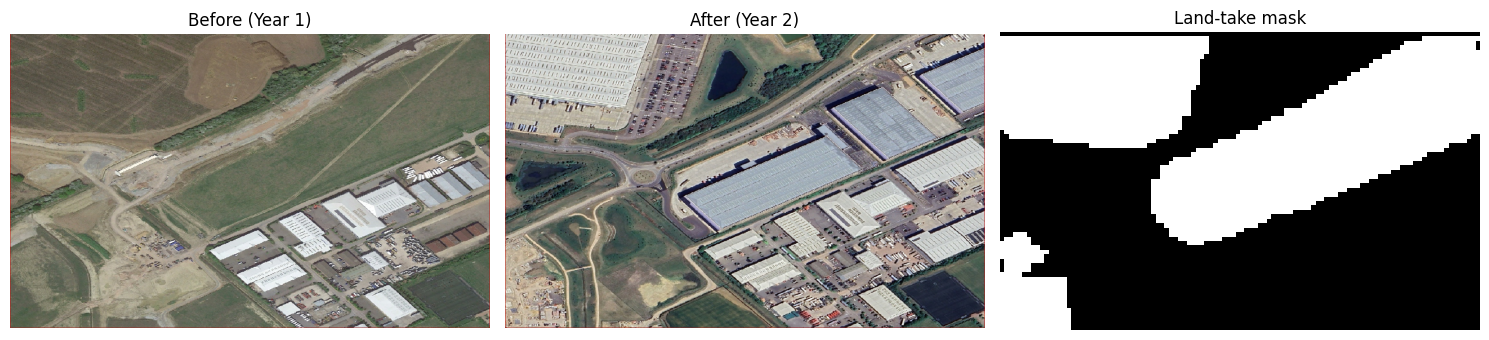

In [15]:
from pathlib import Path
import sys
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# Add repo root to Python path
root = Path().resolve().parents[0]  # one level up from notebooks/
sys.path.append(str(root))

from src.config import VHR_DIR, MASK_DIR

print("VHR_DIR:", VHR_DIR)
print("MASK_DIR:", MASK_DIR)

# list the files Python sees
print("Files in VHR_DIR:")
for p in VHR_DIR.glob("*.tif"):
    print(" ", p.name)

# id of one tile to visualize
fname = "a-0-47134313698222_52-09242527089813"

vhr_path = VHR_DIR / f"{fname}_RGBY_Mosaic.tif"
mask_path = MASK_DIR / f"{fname}_mask.tif"

with rasterio.open(vhr_path) as src:
    img = src.read()          # (bands, H, W)
    print("VHR shape:", img.shape)

with rasterio.open(mask_path) as src_m:
    mask = src_m.read(1)      # (H, W)
    print("Mask shape:", mask.shape)

# quick RGB plot using first 3 bands (year 1 = BEFORE)
before = np.stack([img[0], img[1], img[2]], axis=-1)
before = (before - before.min()) / (before.max() - before.min() + 1e-6)

# RGB using last 3 bands (year 2 = AFTER)
after = np.stack([img[3], img[4], img[5]], axis=-1)
after = (after - after.min()) / (after.max() - after.min() + 1e-6)

# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(before)
ax[0].set_title("Before (Year 1)")
ax[0].axis("off")

ax[1].imshow(after)
ax[1].set_title("After (Year 2)")
ax[1].axis("off")

ax[2].imshow(mask, cmap="gray")
ax[2].set_title("Land-take mask")
ax[2].axis("off")

plt.tight_layout()
plt.show()




Scriptet under henter ut IDene til tilesene som er lagret i data/raw/vhr, og 

In [ ]:
from src.data.habloss_dataset import HablossSampleDataset

from pathlib import Path
from src.config import VHR_DIR

# find all *_RGBY_Mosaic.tif files
all_vhr_files = list(VHR_DIR.glob("*_RGBY_Mosaic.tif"))

# extract ID (filename without suffix)
ids = [f.stem.replace("_RGBY_Mosaic", "") for f in all_vhr_files]

print("Found", len(ids), "IDs in VHR_DIR")


ds = HablossSampleDataset(ids)

for i, fid in enumerate(ids):
    img, mask = ds[i]
    print(f"{i+1}. {fid}")
    print("image shape:", img.shape)
    print("   mask  shape:", mask.shape)



Found 6 IDs in VHR_DIR
1. a-1-34144867248374_47-02619422462487
   image shape: torch.Size([6, 657, 963])
   mask  shape: torch.Size([67, 98])
2. a-0-47134313698222_52-09242527089813
   image shape: torch.Size([6, 656, 1069])
   mask  shape: torch.Size([67, 108])
3. a-1-58467935875357_47-05443474717619
   image shape: torch.Size([6, 658, 963])
   mask  shape: torch.Size([67, 97])
4. a-0-54402407469629_44-04188024421709
   image shape: torch.Size([6, 655, 913])
   mask  shape: torch.Size([66, 92])
5. a-1-18139547412802_52-25772329329998
   image shape: torch.Size([6, 658, 1071])
   mask  shape: torch.Size([67, 108])
6. a-0-77133618972711_46-45684360844514
   image shape: torch.Size([6, 654, 950])
   mask  shape: torch.Size([66, 95])
